<a href="https://colab.research.google.com/github/rorschach02/Plant-Disease---Streamlit-Deployment/blob/main/Plant_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plant Disease Prediction 

-> Here, I'll create a CNN model that will be able to predict whether a plant is suffering from a disease or not. 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array , array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D
from keras.layers import Activation, Flatten , Dropout , Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical


I'll plot images from the collection and visualize them

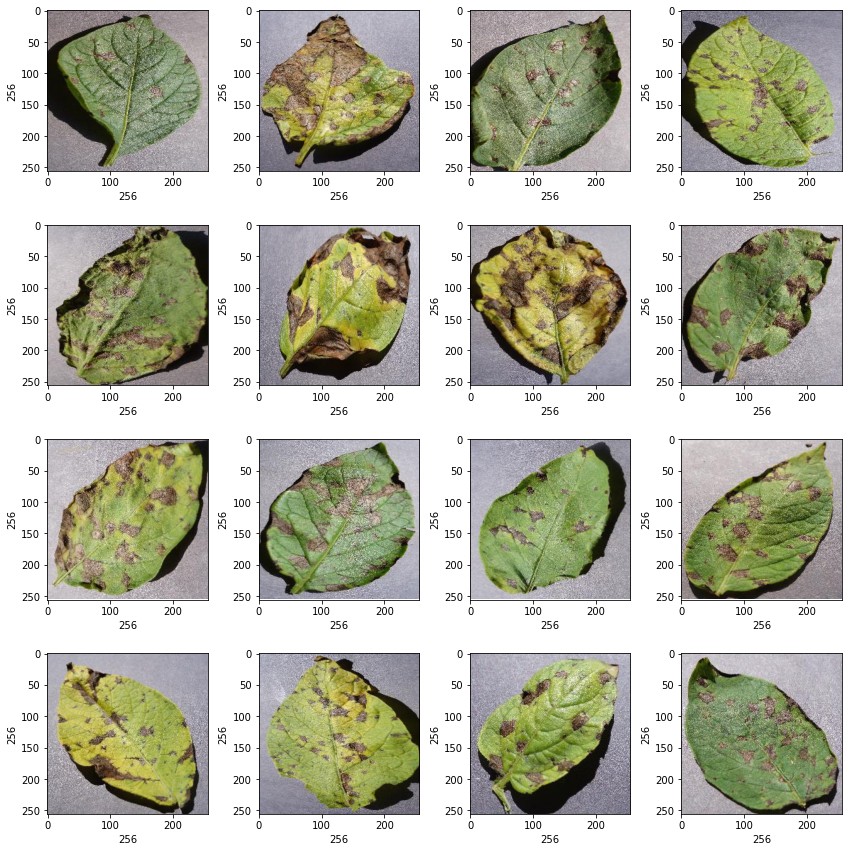

In [3]:
plt.figure(figsize=(12,12))

path = '/content/drive/My Drive/Plant_images_pianalytix/Potato___Early_blight'

for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10) #width of image
  plt.ylabel(rand_img.shape[0], fontsize = 10) #height of image 

Now I'll Convert the images into array. 

In [4]:
def convert_image_to_array(image_dir):
  try: 
    image = cv2.imread(image_dir)
    if image is not None:
      i
      
      
      mage = cv2.resize(image, (256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f'Error : {e}')
    return None 


In [5]:
dir = '/content/drive/My Drive/Plant_images_pianalytix'
root_dir = listdir(dir)
image_list , label_list = [] , []
all_labels = ['Corn-Common_rust' , 'Potato___Early_blight' , 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

#Reading and converting image to numpy array 
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f'{dir}/{directory}/{files}'
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

## Coverting all the images to numpy array

In [6]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

2    300
1    300
0    300
dtype: int64

In [7]:
image_list[0].shape

(256, 256, 3)

In [8]:
label_list = np.array(label_list)
label_list.shape

(900,)

### Splitting into test and train dataset 

In [9]:
x_train , x_test , y_train , y_test = train_test_split(image_list, label_list, test_size = 0.2 , random_state = 10) 

### Normalizing the dataset 

In [10]:
x_train = np.array(x_train , dtype=np.float16) / 255.0
x_test = np.array(x_test , dtype=np.float16) / 255.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)


### One-Hot Encoding

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Model - Building

#### Creating the Network Architecture for the model 

In [12]:
model = Sequential()
model.add(Conv2D(32, (3,3) , padding = 'same' , input_shape = (256,256,3) , activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64, (3,3) , padding = 'same' ,  activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64 , activation = 'relu'))
model.add(Dense(3 , activation = 'softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 112896)            0         
                                                                 
 dense (Dense)               (None, 64)                7

#### Compiling the model 

In [13]:
model.compile(loss = 'categorical_crossentropy' , optimizer = Adam(0.0001) , metrics=['accuracy']) 

### Splitting dataset into validation and training data 

In [14]:
x_train , x_val , y_train , y_val = train_test_split(x_train , y_train , test_size = 0.2)

### Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning.

In [15]:
epochs = 50 
batch_size = 128 
history = model.fit(x_train , y_train , batch_size = batch_size , epochs = epochs , validation_data = (x_val,y_val))

Epoch 1/50
5/5 [==============================] - 39s 7s/step - loss: 0.9093 - accuracy: 0.5365 - val_loss: 0.5534 - val_accuracy: 0.8333
Epoch 2/50
5/5 [==============================] - 36s 7s/step - loss: 0.4601 - accuracy: 0.8333 - val_loss: 0.3471 - val_accuracy: 0.9028
Epoch 3/50
5/5 [==============================] - 37s 7s/step - loss: 0.2798 - accuracy: 0.9462 - val_loss: 0.2278 - val_accuracy: 0.9514
Epoch 4/50
5/5 [==============================] - 37s 7s/step - loss: 0.1922 - accuracy: 0.9566 - val_loss: 0.1856 - val_accuracy: 0.9167
Epoch 5/50
5/5 [==============================] - 37s 7s/step - loss: 0.1361 - accuracy: 0.9670 - val_loss: 0.1466 - val_accuracy: 0.9306
Epoch 6/50
5/5 [==============================] - 37s 7s/step - loss: 0.1057 - accuracy: 0.9740 - val_loss: 0.1291 - val_accuracy: 0.9375
Epoch 7/50
5/5 [==============================] - 37s 7s/step - loss: 0.0884 - accuracy: 0.9757 - val_loss: 0.0950 - val_accuracy: 0.9514
Epoch 8/50
5/5 [==================

### Saving the Model

In [17]:
model.save('/content/drive/My Drive/plant_disease.h5')
#serialize model to json
json_model = model.to_json()

#save the model architecture to JSON file 
with open('/content/drive/My Drive/plant_disease.json' , 'w') as json_file:
  json_file.write(json_model)

#saving the weights of the model 
model.save_weights('/content/drive/My Drive/plant_weights.h5')

### Plotting the accuracy of the model 

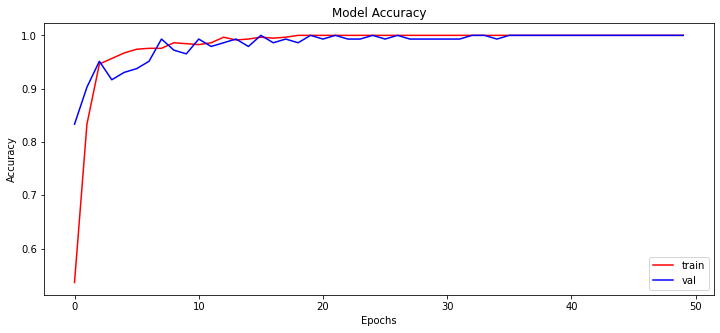

In [18]:
plt.figure(figsize = (12,5))
plt.plot(history.history['accuracy'] , color = 'r')
plt.plot(history.history['val_accuracy'] , color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train' , 'val'])
plt.show()

### Evaluating the model to know the accuracy of the model.

In [19]:
print('[INFO] Calculating model accuracy')
scores = model.evaluate(x_test , y_test)
print(f'Test Accuracy: {scores[1]*100}')

[INFO] Calculating model accuracy
6/6 [==============================] - 3s 546ms/step - loss: 0.0086 - accuracy: 1.0000
Test Accuracy: 100.0


### Predicting the testing dataset label 

In [20]:
y_pred = model.predict(x_test)

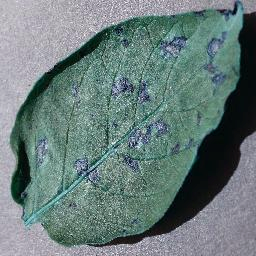

In [21]:
#plotting image to compare 
img = array_to_img(x_test[10])
img

In [22]:
#Finding max value from the prediction list and comparing original value vs predicted value 
print('Originally : ' , all_labels[np.argmax(y_test[10])])
print('Predicted : ' , all_labels[np.argmax(y_pred[10])])

Originally :  Potato___Early_blight
Predicted :  Potato___Early_blight


In [5]:
import tensorflow as tf
import keras 
print(keras.__version__)
print(tf.__version__)

2.7.0
2.7.0
